# Gender Recognition by Voice | 03 | K Nearest Neighbors

## KNN Method Overview
The K Nearest Neighbors (KNN) classification method is of a particular type of classifier that relies on observing the "field" of data rather than using linear or logistic regression to fit a curve to a set of data. Regression methods (curve fitting) attempt to separate data by creating a wall between the prediction categories. However, if a data set does not lend itself to being easily separated in this manner, a more flexible method such as KNN may prove useful.

To make a prediction, KNN looks around the data field from the perspective of a point in question and classifies itself depending on what is most prevelant in that area. In the example figure below, KNN (with the parameter k = 3) determines that, of the three (3) closest points to itself, most are blue and therefore it must be blue as well. As seen in notebook 01, our voice data is well grouped and therefore this type of classification should prove highly effective.

![knn](img/knn.png)
###### Figure on the left shows the KNN method where k = 3. Of the three (3) closest points, two are blue, thus informing the KNN model that any future points at this location are likely to be blue as well. The plot on the right shows how KNN has evaluated the entire field.
*Image from An Introduction to Statistical Learning, Sixth Printing (Figure 2.14)*

## Import Libraries

In [1]:
import obj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
pd.set_option('display.max_columns', 30)  # set pandas to display all columns
sns.set_style('whitegrid')  # set plot backgrounds to white

# Set graphics to appear inline with notebook code
%matplotlib inline

Import scaled data from previous notebook.

In [2]:
data_scale = obj.load('var/data_scale')

## Split data into Training set and Testing set
It is important to split the data into two distinct sets. The *training set* is a subset of the total data and will be used to shape the KNN model. The *testing set* is the remainder of the data and will be used to evaluate the quality of the model. The testing data will be kept separate so as to mimic "fresh samples" that our trained model will need to classify. However, because we know their true classification, we can compare their known class with their predicted class to quantify the success of our model.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scale.drop('label',axis=1), data_scale['label'],
                                                    test_size=0.33)

## Create KNN model and determine best parameters
The *k* parameter is extremely important in the KNN classifier model. A *k* value that is too low will overfit the data, missing general trends that better distinguish the different classes. Conversely, a *k* value that is too high will underfit the data and lead to a classification model that creates loose and ill-defined boundaries around key features in the data field. 

To find the optimal value of *k*, we will use a simple brute-force strategy. Namely, we will try many values of *k* and evaluate each, settling for the one with the best prediction results.

### Test various values

In [4]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
kvals = range(1,20)  # range of k parameters to test

for i in kvals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

### Determine optimal value
After evaluating many values of *k*, we can easily determine which value yields the best results. The plot below visualizes our process.

Lowest error of 0.0258126195029 occurs at k=1.


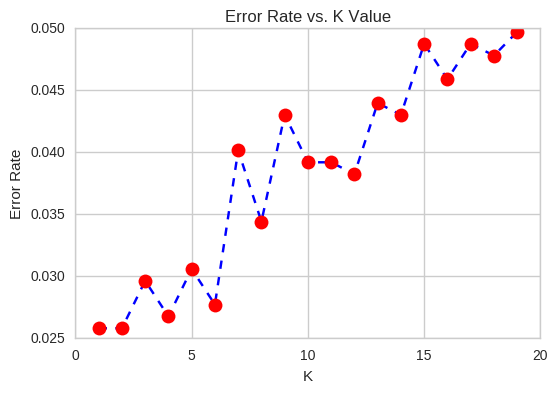

In [5]:
plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Determine location of best performance
kloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))

## Create model using best parameters and evaluate performance
Using our optimal *k* value, we will run the analysis again and proceed to quantify our classification accuracy.

In [6]:
# Instantiate model with optimal k value
knn = KNeighborsClassifier(n_neighbors=kvals[kloc])

# Fit model to test data
knn.fit(X_train,y_train)

# Create predictions from test data
y_pred = knn.predict(X_test)

# Run classification metrics
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[478  15]
 [ 12 541]]


Classification Report:
             precision    recall  f1-score   support

     female       0.98      0.97      0.97       493
       male       0.97      0.98      0.98       553

avg / total       0.97      0.97      0.97      1046



Confusion matricies and classification reports are great ways to understand the accuracy of a classifier model. Explaining their use is beyond the scope of this project, but it is easy to see that this model does a fair job of classifying our data, scoring an average of %97 in all three categories.

## Try analysis with Uncorrelated Data
As mentioned in notebook 02, it is possible that our prediction may be hampered by the correlation of some features within the data. We will run the same KNN optimization process as above and see if there is a significant difference between the results.

Lowest error of 0.0239005736138 occurs at k=5.


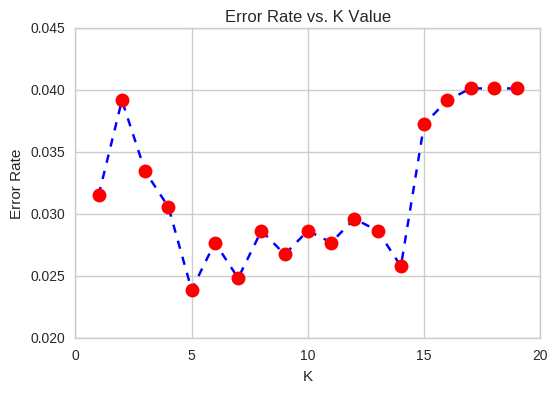

In [7]:
# Load data set with correlated features removed
data_scaleNoCorr = obj.load('var/data_scaleNoCorr')

# Split data between testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data_scaleNoCorr.drop('label',axis=1), data_scaleNoCorr['label'],
                                                    test_size=0.33)

# Test many values of k
error_rate = []
kvals = range(1,20)

for i in kvals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

# Show plot of test results
plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Determine location of best performance
kloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))

In [8]:
# Use classification metrics to determine success of method
knn = KNeighborsClassifier(n_neighbors=kvals[kloc])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[529  16]
 [  9 492]]


Classification Report:
             precision    recall  f1-score   support

     female       0.98      0.97      0.98       545
       male       0.97      0.98      0.98       501

avg / total       0.98      0.98      0.98      1046



As seen from the reports above, these methods are extremely similar in quality. The first model did not seem to respond negatively overall to the inclusion of correlated features.

## Conclusion
For our data set, the KNN method was very successful in differentiating between male and female voices, given the acoustic properties provided. However, there is no room for improvement in this model. If we desire to push above the 0.97 f1 score, a different method must be used. We will see if the *Random Forest* or *Neural Network* methods can provide even better results.